In [1]:
from modsim import *
from pandas import read_html

In [3]:
filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')

In [5]:
len(tables)

6

In [6]:
tables[0]

,1400,1500,1600,1700,1800,1900,2000,2100[1]
year,,,,,,,,
population (in billions),0.35–0.40,0.42–0.50,0.50–0.58,0.60–0.68,0.89–0.98,1.56–1.71,6.06–6.15,ca. 10–13
growth p.a.[2],<0%,<0.12%,0.15%–0.3%,0.1%–0.15%,0.3%–0.5%,0.5%–0.6%,1.3%–1.4%,0.7%–0.8%


In [7]:
table2 = tables[2]

In [9]:
table2.head()

,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
table2.columns = ['census', 'prb', 'un', 'maddison','hyde', 'tanton', 'biraben', 'mj', 'thomlinson', 'durand', 'clark']

In [11]:
table2.head()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
cencus = table2.census / 1e9
un = table2.un / 1e9
cencus.tail(), un.tail()

(Year
 2012    7.013871
 2013    7.092128
 2014    7.169968
 2015    7.247893
 2016    7.325997
 Name: census, dtype: float64,
 Year
 2012    7.080072
 2013    7.162119
 2014    7.243784
 2015    7.349472
 2016         NaN
 Name: un, dtype: float64)

In [17]:
def plot_estimates():
    cencus.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year', ylabel='World population (billion)')

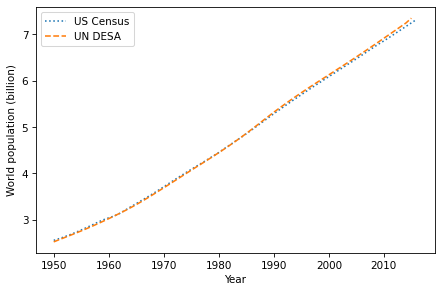

In [18]:
plot_estimates()

In [19]:
cencus[1950]

np.float64(2.557628654)

In [23]:
t_0 = cencus.index[0]
t_end = cencus.index[-1]
t_0, t_end

(np.int64(1950), np.int64(2016))

In [24]:
total_growth = cencus[t_end] - cencus[t_0]
total_growth

np.float64(4.768368055)

In [25]:
annual_growth = total_growth / (t_end - t_0)
annual_growth

np.float64(0.07224800083333333)

In [26]:
results = TimeSeries()
results[t_0] = cencus[t_0]
for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth

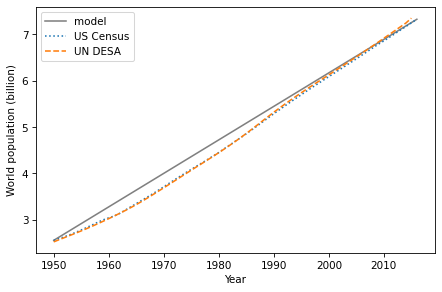

In [27]:
results.plot(color='gray', label='model')
cencus.plot(style=':', label='US Census')
un.plot(style='--', label='UN DESA')
decorate(xlabel='Year', ylabel='World population (billion)')